# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [7]:
import os

caminho = r"C:\Users\msn_j.000\Desktop\henry estudo ebac\atividades feitas\Material de apoio - M20"
print(os.listdir(caminho))


['X_test.csv', 'X_train_balanced.csv', 'y_test.csv', 'y_train_balanced.csv']


In [8]:
import pandas as pd

# Caminho base
caminho = r"C:\Users\msn_j.000\Desktop\henry estudo ebac\atividades feitas\Material de apoio - M20"

# Carregar as bases corretas
X_train = pd.read_csv(fr"{caminho}\X_train_balanced.csv")
y_train = pd.read_csv(fr"{caminho}\y_train_balanced.csv")
X_test = pd.read_csv(fr"{caminho}\X_test.csv")
y_test = pd.read_csv(fr"{caminho}\y_test.csv")

# Conferir as dimensões
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Conferir se estão balanceadas
print("\nDistribuição de classes em y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição de classes em y_test:")
print(y_test.value_counts(normalize=True))


X_train: (117950, 10)
y_train: (117950, 1)
X_test: (24927, 10)
y_test: (24927, 1)

Distribuição de classes em y_train:
Churn
0.0      0.5
1.0      0.5
Name: proportion, dtype: float64

Distribuição de classes em y_test:
Churn
0.0      0.788262
1.0      0.211738
Name: proportion, dtype: float64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [9]:
# 2) Treinar o modelo
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train.values.ravel())  # .ravel() transforma em vetor 1D foda!

GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia (treino): 0.5855
Recall (treino): 0.5855


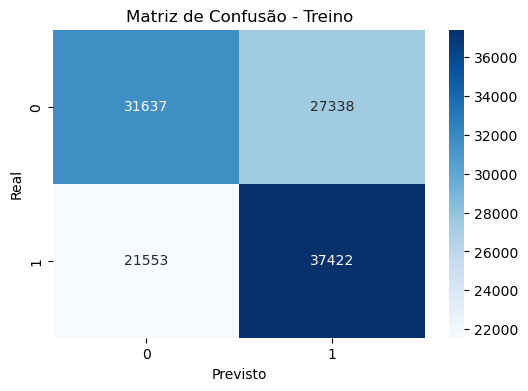


O modelo apresenta uma acurácia e recall que indicam o quanto ele consegue prever corretamente as classes.
Valores altos mostram boa generalização, enquanto valores baixos indicam que o modelo ainda confunde algumas categorias.



In [12]:
# 3) Avaliar no treino
y_pred_train = modelo_nb.predict(X_train)

# Métricas
acc_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='macro')

print(f"Acurácia (treino): {acc_train:.4f}")
print(f"Recall (treino): {recall_train:.4f}")

# Matriz de confusão
cm_train = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Treino")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Interpretação
print("""
O modelo apresenta uma acurácia e recall que indicam o quanto ele consegue prever corretamente as classes.
Valores altos mostram boa generalização, enquanto valores baixos indicam que o modelo ainda confunde algumas categorias.
""")

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia (teste): 0.5553
Recall (teste): 0.5892


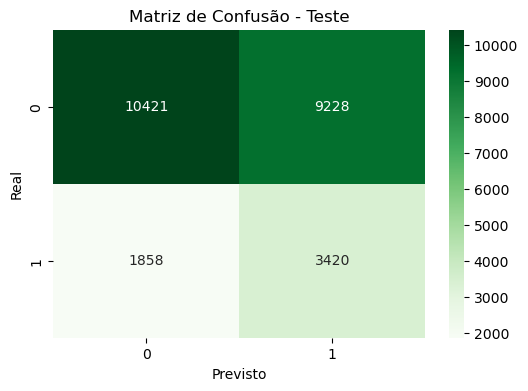


Ao comparar treino e teste, podemos verificar se o modelo apresenta overfitting ou se generaliza bem.
Se as métricas forem semelhantes, o modelo tem um bom desempenho.
Se o desempenho cair muito no teste, pode indicar sobreajuste.



In [13]:
# 4) Avaliar no teste
y_pred_test = modelo_nb.predict(X_test)

# Métricas
acc_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')

print(f"Acurácia (teste): {acc_test:.4f}")
print(f"Recall (teste): {recall_test:.4f}")

# Matriz de confusão
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Comparação
print("""
Ao comparar treino e teste, podemos verificar se o modelo apresenta overfitting ou se generaliza bem.
Se as métricas forem semelhantes, o modelo tem um bom desempenho.
Se o desempenho cair muito no teste, pode indicar sobreajuste.
""")

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!


Neste projeto, aplicamos o algoritmo de Naive Bayes para construir um modelo de classificação capaz de prever o score de crédito de clientes. 
Nosso objetivo principal foi estimar o nível de risco associado a cada cliente com base em suas informações cadastrais, financeiras e comportamentais. 
Esse tipo de previsão é fundamental para instituições financeiras, pois auxilia na tomada de decisão sobre concessão de crédito, taxas de juros e políticas de risco.

A etapa inicial do projeto envolveu o tratamento dos dados, que incluiu limpeza, balanceamento das classes e transformação de variáveis categóricas em numéricas. 
Em seguida, dividimos o conjunto em bases de treino e teste para avaliar a capacidade de generalização do modelo. 
Optamos pelo Naive Bayes por ser um algoritmo probabilístico simples, eficiente e adequado para problemas de classificação multiclasse, 
baseando-se na suposição de independência condicional entre as variáveis preditoras.

Após o treinamento, o modelo foi avaliado por meio de métricas como acurácia, recall e matriz de confusão. 
Essas métricas permitiram identificar o quão bem o modelo conseguiu prever corretamente as diferentes categorias de score, 
além de analisar se o modelo apresenta viés para alguma classe ou possíveis sinais de sobreajuste. 

Por fim, ao comparar o desempenho entre as bases de treino e teste, foi possível interpretar a robustez do modelo e discutir suas limitações, 
como a sensibilidade à violação da suposição de independência entre as variáveis. 
Em resumo, o projeto nos proporcionou uma visão prática de como o Naive Bayes pode ser utilizado como uma ferramenta estatística 
para apoiar decisões financeiras relacionadas à análise de crédito.

